In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('df_completo.csv', low_memory=False)

In [4]:
# Muestro las primeras filas del DataFrame
df.head()

,title,id,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,...,playtime_2weeks,user_url,funny,last_edited,item_id,helpful,recommend,review,posted year,sentiment_score
0,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/id/kube134,NaN,NaN,251990.0,1 of 1 people (100%) found this review helpful,True,It's good to be a magical queen... if you surv...,2014.0,0
1,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,2 people found this review funny,NaN,332800.0,194 of 282 people (69%) found this review helpful,True,10/10 would take kids here for birthday,2014.0,0
2,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,NaN,NaN,319630.0,1 of 2 people (50%) found this review helpful,True,"Well for starters, when I write reviews they a...",2015.0,0
3,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,NaN,NaN,6020.0,No ratings yet,True,10/10 lets you cut people into sushi if the pr...,2015.0,2
4,Half-Life,70,1,0,0,0,0,0,0,0,...,0,http://steamcommunity.com/profiles/76561198030...,NaN,NaN,55230.0,No ratings yet,True,"10/10 has Sasha Grey, so fun for whole family.",2015.0,0


In [5]:
# Obtiene información general sobre el DataFrame, como el tipo de datos y los valores no nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52707 entries, 0 to 52706
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      52707 non-null  object 
 1   id                         52707 non-null  int64  
 2   Action                     52707 non-null  int64  
 3   Adventure                  52707 non-null  int64  
 4   Animation &amp; Modeling   52707 non-null  int64  
 5   Audio Production           52707 non-null  int64  
 6   Casual                     52707 non-null  int64  
 7   Design &amp; Illustration  52707 non-null  int64  
 8   Early Access               52707 non-null  int64  
 9   Education                  52707 non-null  int64  
 10  Free to Play               52707 non-null  int64  
 11  Indie                      52707 non-null  int64  
 12  Massively Multiplayer      52707 non-null  int64  
 13  Photo Editing              52707 non-null  int

In [6]:
# Calcula estadísticas descriptivas para las columnas numéricas
df.describe()

,id,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,Free to Play,...,Video Production,Web Publishing,year,items_count,steam_id,playtime_forever,playtime_2weeks,item_id,posted year,sentiment_score
count,52707.000000,52707.000000,52707.000000,52707.0,52707.0,52707.000000,52707.0,52707.000000,52707.0,52707.000000,...,52707.0,52707.0,52707.000000,52707.000000,5.270700e+04,52707.000000,52707.000000,52682.000000,43522.000000,52707.000000
mean,5963.007418,0.609653,0.019978,0.0,0.0,0.007836,0.0,0.000133,0.0,0.005502,...,0.0,0.0,2004.799571,146.406132,7.656120e+16,4638.936289,23.420039,170817.665066,2014.155508,0.327034
std,25881.730852,0.487833,0.139927,0.0,0.0,0.088173,0.0,0.011524,0.0,0.073973,...,0.0,0.0,2.953024,233.530828,3.839649e+07,13890.877307,209.629254,132090.477195,0.843346,0.739334
min,10.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,1990.000000,1.000000,7.656120e+16,0.000000,0.000000,10.000000,2010.000000,0.000000
25%,220.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,2004.000000,55.000000,7.656120e+16,82.000000,0.000000,9480.000000,2014.000000,0.000000
50%,320.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,2005.000000,95.000000,7.656120e+16,559.000000,0.000000,218230.000000,2014.000000,0.000000
75%,4000.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,2006.000000,167.000000,7.656120e+16,2751.000000,0.000000,263020.000000,2015.000000,0.000000
max,339610.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,...,0.0,0.0,2017.000000,7762.000000,7.656120e+16,356217.000000,9089.000000,527340.000000,2015.000000,2.000000


Al ver que no todas las columnas tienen datos numericos creamos un df para poder trabajar 

In [7]:
#Creamos una lista con solo las variables numéricas
df_eda= df.select_dtypes(include = (int,float))
df_eda.drop(columns=['Action', 'Adventure',
       'Audio Production', 'Casual', 'Design &amp; Illustration',
       'Early Access', 'Education', 'Free to Play', 'Indie', 'Animation &amp; Modeling',
       'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
       'Software Training', 'Sports', 'Strategy', 'Utilities',
       'Video Production', 'Web Publishing'], inplace=True)

In [8]:
df_eda.columns

Index(['id', 'year', 'items_count', 'steam_id', 'playtime_forever',
       'playtime_2weeks', 'item_id', 'posted year', 'sentiment_score'],
      dtype='object')

In [9]:
df_eda

,id,year,items_count,steam_id,playtime_forever,playtime_2weeks,item_id,posted year,sentiment_score
0,70,1998,476,76561198031442694,4,0,251990.0,2014.0,0
1,70,1998,75,76561198030567998,21,0,332800.0,2014.0,0
2,70,1998,75,76561198030567998,21,0,319630.0,2015.0,0
3,70,1998,75,76561198030567998,21,0,6020.0,2015.0,2
4,70,1998,75,76561198030567998,21,0,55230.0,2015.0,0
...,...,...,...,...,...,...,...,...,...
52702,30,2003,63,76561198085345522,4,0,1250.0,2014.0,0
52703,30,2003,63,76561198085345522,4,0,218230.0,2013.0,0
52704,30,2003,297,76561198089218473,15,0,293010.0,2014.0,0
52705,13230,2004,48,76561198045631910,133,0,252490.0,2014.0,0


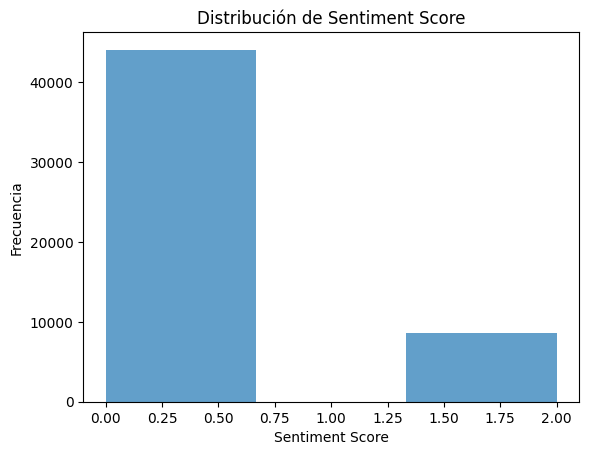

In [10]:
# Histograma de sentiment_score
plt.hist(df_eda['sentiment_score'], bins=3, alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentiment Score')
plt.show()

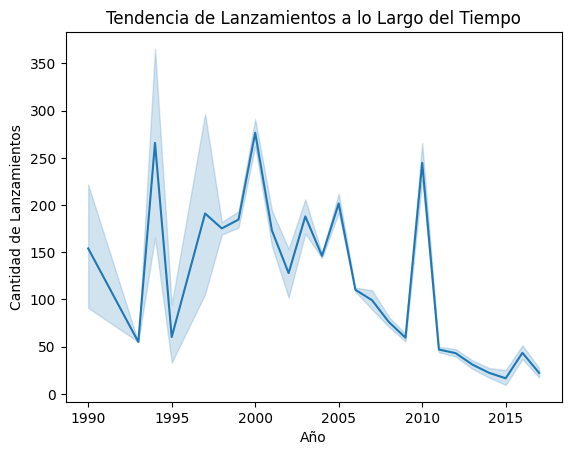

In [11]:
# Gráfico de líneas para 'year'
sns.lineplot(data=df, x='year', y='items_count')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lanzamientos')
plt.title('Tendencia de Lanzamientos a lo Largo del Tiempo')
plt.show()

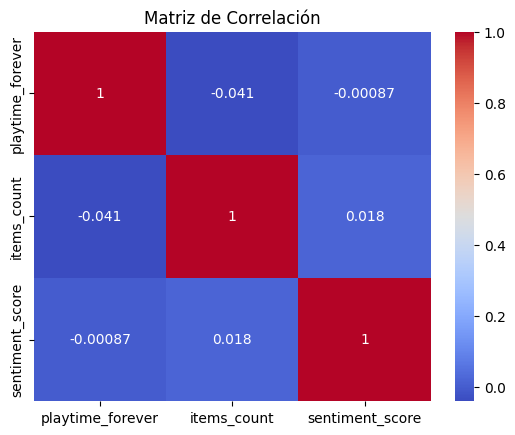

In [12]:
# Matriz de correlación
correlation_matrix = df[['playtime_forever', 'items_count', 'sentiment_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

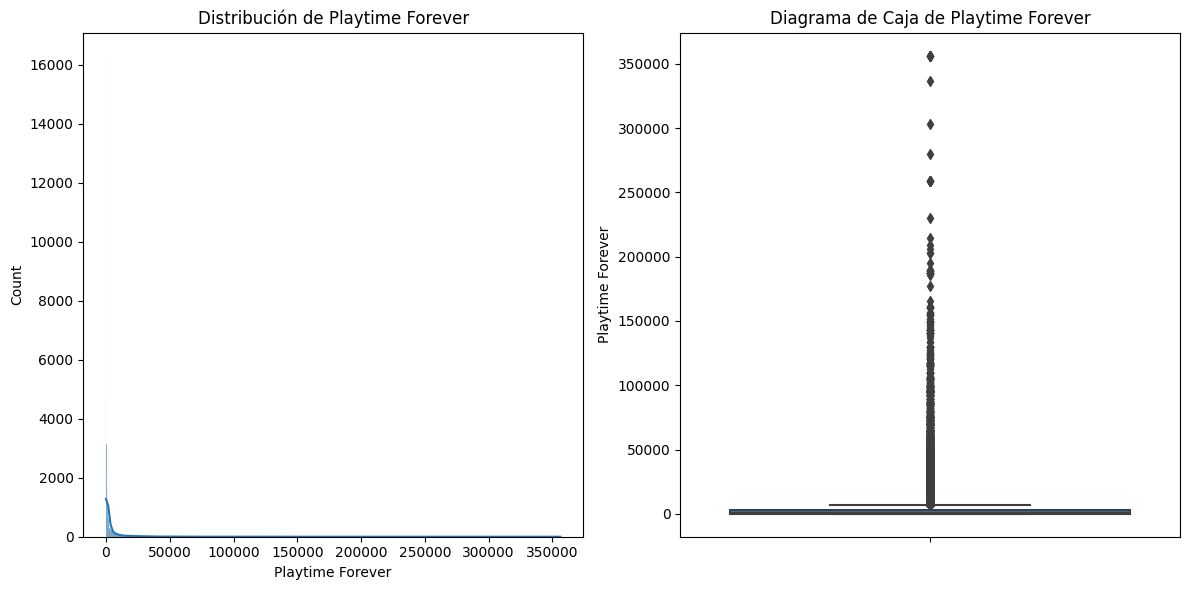

In [13]:
# Histograma y diagrama de caja de 'playtime_forever'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['playtime_forever'], kde=True)
plt.xlabel('Playtime Forever')
plt.title('Distribución de Playtime Forever')

plt.subplot(1, 2, 2)
sns.boxplot(y='playtime_forever', data=df)
plt.ylabel('Playtime Forever')
plt.title('Diagrama de Caja de Playtime Forever')

plt.tight_layout()
plt.show()

Top de juegos

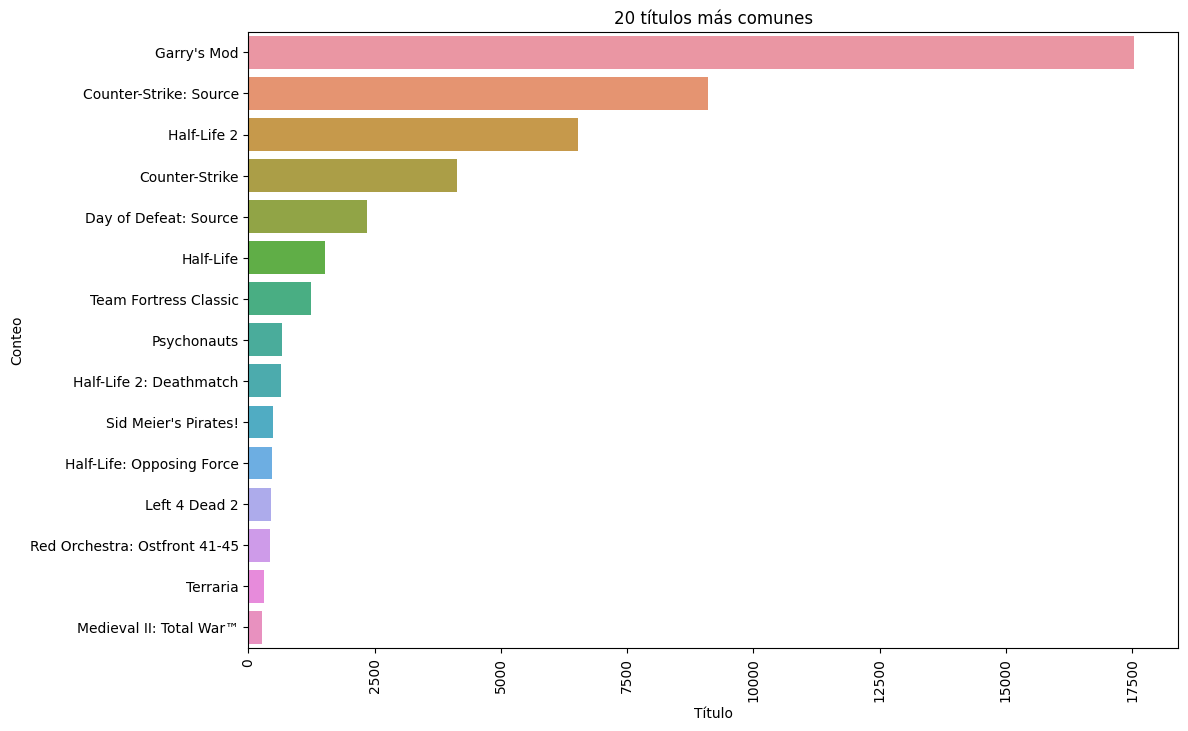

In [14]:
# Obtener los 20 títulos más comunes
top_titles = df['title'].value_counts().nlargest(15)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.xlabel('Título')
plt.ylabel('Conteo')
plt.title('20 títulos más comunes')
plt.xticks(rotation=90)
plt.show()

Dispersion de horas de juego

años que tuvieron la mayor cantidad de horas de juego para cada usuario

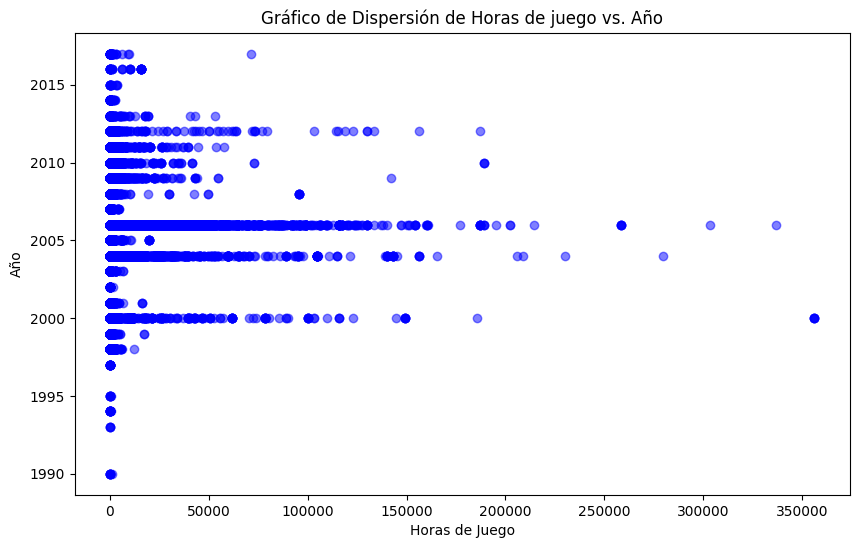

In [15]:
plt.figure(figsize=(10, 6))

# Crea el scatter plot de playtime vs. price
plt.scatter(df_eda['playtime_forever'], df_eda['year'], color='blue', alpha=0.5)

# Personaliza el gráfico con etiquetas y título
plt.title('Gráfico de Dispersión de Horas de juego vs. Año')
plt.xlabel('Horas de Juego')
plt.ylabel('Año');

Horas de juego por categoria en cada año

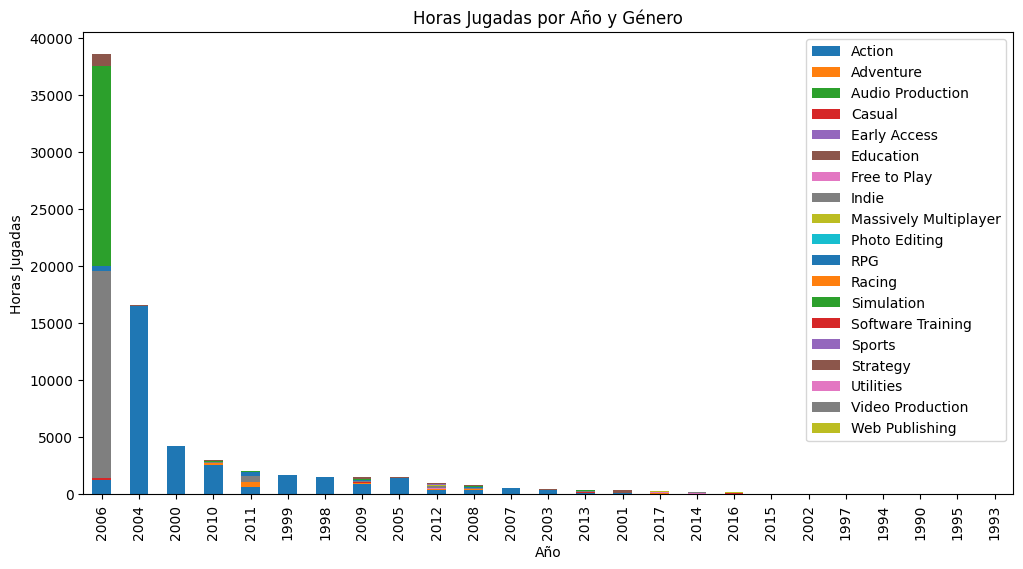

In [16]:
genres = ['Action', 'Adventure', 'Audio Production', 'Casual',
             'Early Access', 'Education', 'Free to Play', 'Indie',
             'Massively Multiplayer', 'Photo Editing', 'RPG', 'Racing', 'Simulation',
             'Software Training', 'Sports', 'Strategy', 'Utilities', 'Video Production', 'Web Publishing']

relevant_columns = ['year', 'playtime_forever'] + genres
df_filtered = df[relevant_columns].copy()

df_grouped = df_filtered.groupby('year')[genres].sum()
df_grouped['total_playtime'] = df_grouped[genres].sum(axis=1)
df_grouped = df_grouped.sort_values('total_playtime', ascending=False)
df_filtered = df[(df['year'] >= 2001) & (df['year'] <= 2006)][relevant_columns].copy()

df_grouped[genres].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Año')
plt.ylabel('Horas Jugadas')
plt.title('Horas Jugadas por Año y Género')
plt.legend(loc='upper right')
plt.show()

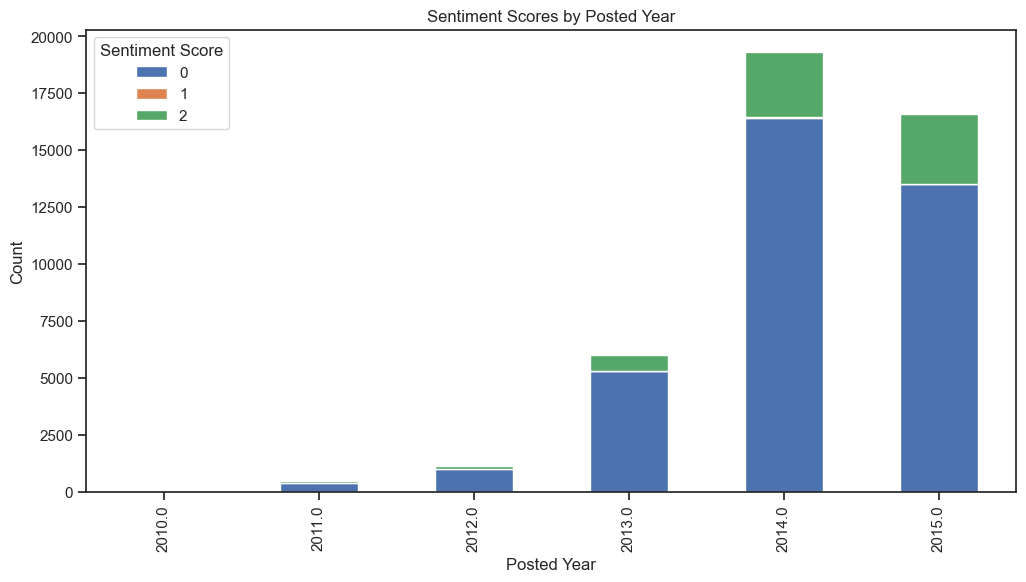

In [17]:
# Group the data by 'posted year' and 'sentiment_score' and count the occurrences
grouped_data = df.groupby(['posted year', 'sentiment_score']).size().reset_index(name='count')

# Pivot the data to have 'sentiment_score' as columns
pivot_data = grouped_data.pivot(index='posted year', columns='sentiment_score', values='count')

# Plot the grouped data
sns.set(style='ticks')
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Posted Year')
plt.ylabel('Count')
plt.title('Sentiment Scores by Posted Year')
plt.legend(title='Sentiment Score', loc='upper left')
plt.show()